In [51]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [14]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


<AxesSubplot:ylabel='Frequency'>

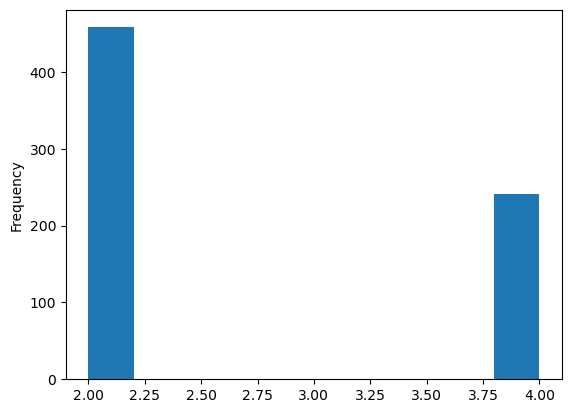

In [15]:
data = pd.read_csv("cell_samples.csv")
data.head()
data['Class'].value_counts()
data['Class'].plot(kind="hist")


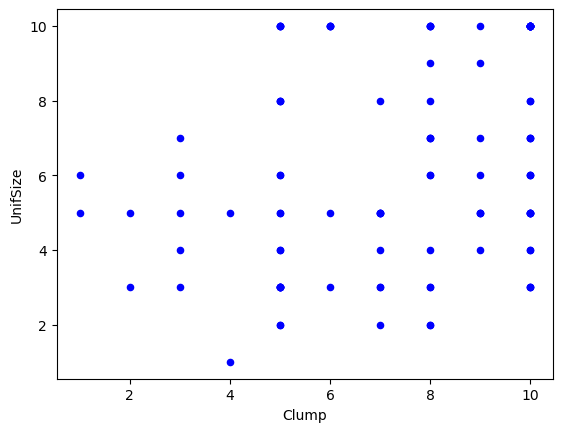

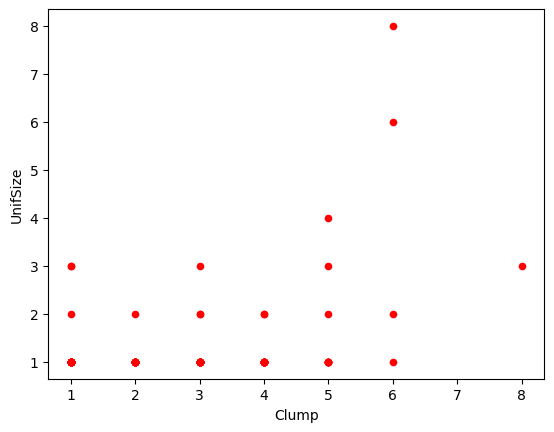

In [16]:

ax1 = data[data['Class']==4][0:100].plot(kind='scatter',x='Clump',y='UnifSize',color="blue")
ax2 = data[data['Class']==2][0:100].plot(kind='scatter',x='Clump',y='UnifSize',color="red")
plt.show(ax1,ax2)

In [17]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [18]:
### data cleaning 

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [20]:
data["BareNuc"].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [21]:
coulmn = 'BareNuc'
value = ["?"]

In [22]:
missvalue = data[data[coulmn].isin(value)][coulmn]

In [23]:
missvalue.value_counts()

?    16
Name: BareNuc, dtype: int64

In [24]:
data.drop(data[data[coulmn].isin(value)][coulmn].index,inplace=True)

In [25]:
data["BareNuc"].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           683 non-null    int64 
 1   Clump        683 non-null    int64 
 2   UnifSize     683 non-null    int64 
 3   UnifShape    683 non-null    int64 
 4   MargAdh      683 non-null    int64 
 5   SingEpiSize  683 non-null    int64 
 6   BareNuc      683 non-null    object
 7   BlandChrom   683 non-null    int64 
 8   NormNucl     683 non-null    int64 
 9   Mit          683 non-null    int64 
 10  Class        683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [27]:
data["BareNuc"] = pd.to_numeric(data["BareNuc"])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    683 non-null    int64
 4   MargAdh      683 non-null    int64
 5   SingEpiSize  683 non-null    int64
 6   BareNuc      683 non-null    int64
 7   BlandChrom   683 non-null    int64
 8   NormNucl     683 non-null    int64
 9   Mit          683 non-null    int64
 10  Class        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [29]:
corr_matrix = data.corr()

In [31]:
corr_matrix["Class"]

ID            -0.084701
Clump          0.714790
UnifSize       0.820801
UnifShape      0.821891
MargAdh        0.706294
SingEpiSize    0.690958
BareNuc        0.822696
BlandChrom     0.758228
NormNucl       0.718677
Mit            0.423448
Class          1.000000
Name: Class, dtype: float64

In [38]:
feauters = data[['Clump','UnifSize','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']]
x = np.asarray(feauters)
x

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  5, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10,  3, ...,  8, 10,  2],
       [ 4,  8,  4, ..., 10,  6,  1],
       [ 4,  8,  5, ..., 10,  4,  1]])

In [40]:
target = data['Class']
y = np.asarray(target)
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

In [41]:
##### LEARN 

In [43]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=2,test_size=0.2)

In [45]:
x_train

array([[4, 1, 1, ..., 2, 1, 1],
       [1, 1, 1, ..., 1, 3, 1],
       [3, 1, 1, ..., 3, 1, 1],
       ...,
       [5, 1, 1, ..., 1, 1, 1],
       [5, 3, 1, ..., 1, 1, 1],
       [8, 6, 4, ..., 6, 1, 1]])

In [48]:
learn = svm.SVC(kernel='rbf')
learn.fit(x_train , y_train)

SVC()

In [52]:
yhat = learn.predict(x_test)
yhat

array([4, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2,
       2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4,
       2, 4, 2, 2, 2])

In [54]:
accuracy = accuracy_score(y_test , yhat)

In [55]:
accuracy

0.9416058394160584